# Load data
Load in the data and handle multiple rows for the same day in speeches.csv

In [1]:
import pandas as pd

# Load exchange rates file

fx = pd.read_csv("fx.csv", skiprows=6, header=None, usecols=[0,1],
                encoding='utf-8', na_values=['-']) #missing exchange rates are marked '-'
fx.columns = ["date", "exchange_rate"]

fx.info()
fx


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5931 entries, 0 to 5930
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5931 non-null   object 
 1   exchange_rate  5869 non-null   float64
dtypes: float64(1), object(1)
memory usage: 92.8+ KB


,date,exchange_rate
0,2021-12-02,1.1339
1,2021-12-01,1.1314
2,2021-11-30,1.1363
3,2021-11-29,1.1276
4,2021-11-26,1.1291
...,...,...
5926,1999-01-08,1.1659
5927,1999-01-07,1.1632
5928,1999-01-06,1.1743
5929,1999-01-05,1.1790


In [5]:
# Load speeches file

speeches = pd.read_csv("speeches.csv", sep = '|', encoding= 'utf-8')
speeches = speeches[['date', 'contents']]
#speeches = pd.read_csv("speeches.csv", sep = '|', usecols=['date', 'contents'])

speeches.dropna(inplace=True)
#speeches.dropna(inplace=True, subset=['contents'])

#Group 'contents' by 'date', then join all contents by date
#We need to also reset index
speeches = speeches.groupby('date')['contents'].apply(lambda x: "".join(x)).reset_index()
#speeches = speeches.groupby('date')['contents'].apply(lambda x: "".join(x.astype(str))).reset_index()
speeches.info()
speeches


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1912 non-null   object
 1   contents  1912 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


,date,contents
0,1997-02-07,Conference organised by the Hungarian Bankin...
1,1997-03-10,Securing the benefits of EMU Address by Al...
2,1997-04-22,Convergence and the role of the European Cen...
3,1997-04-30,The operation of monetary policy in stage th...
4,1997-05-13,The European Central Bank: independent and a...
...,...,...
1907,2021-10-12,SPEECH The contribution of finance to comb...
1908,2021-10-14,SPEECH IMFC Statement Statement by Chri...
1909,2021-10-16,SPEECH Globalisation after the pandemic ...
1910,2021-10-19,SPEECH “Hic sunt leones” – open research q...


In [6]:
# Alternative way: Transform 'content' column then drop duplicates

# Load speeches file
speeches2 = pd.read_csv("speeches.csv", sep = '|')
speeches2 = speeches[['date', 'contents']]
speeches2.dropna(inplace=True)

#Group 'contents' by 'date', then transform column by joining all contents by date
#We then need to drop duplicates
#This method may not be as intuitive?
speeches2['contents'] = speeches2.groupby(['date'])['contents'].transform(lambda x : ''.join(x))
speeches2.drop_duplicates(inplace=True)
speeches2.info()
speeches2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 0 to 1911
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1912 non-null   object
 1   contents  1912 non-null   object
dtypes: object(2)
memory usage: 44.8+ KB


,date,contents
0,1997-02-07,Conference organised by the Hungarian Bankin...
1,1997-03-10,Securing the benefits of EMU Address by Al...
2,1997-04-22,Convergence and the role of the European Cen...
3,1997-04-30,The operation of monetary policy in stage th...
4,1997-05-13,The European Central Bank: independent and a...
...,...,...
1907,2021-10-12,SPEECH The contribution of finance to comb...
1908,2021-10-14,SPEECH IMFC Statement Statement by Chri...
1909,2021-10-16,SPEECH Globalisation after the pandemic ...
1910,2021-10-19,SPEECH “Hic sunt leones” – open research q...


# Merge data

In [7]:
#Merge fx and speeches data into one dataset
#Combine fx and speeches into a new dataframe
df= pd.merge(fx, speeches, how='left')
#df= pd.merge(fx, speeches, on='date', how='left')
#df.info()

#Convert 'date' to be of data type
df['date'] = pd.to_datetime(df['date'])
df['exchange_rate'] = pd.to_numeric(df['exchange_rate'])
#df.info()

#Set index to 'date'
df.set_index('date', inplace = True)
df.info()
#df.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5931 entries, 2021-12-02 to 1999-01-04
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchange_rate  5869 non-null   float64
 1   contents       1751 non-null   object 
dtypes: float64(1), object(1)
memory usage: 139.0+ KB


# Remove entries with obvious outliers or mistakes
We first see if there is any obvious or mistakes by ploting the data

<AxesSubplot:xlabel='date'>

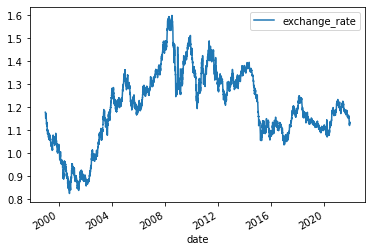

In [8]:
df.plot()

In [9]:
df.describe()

,exchange_rate
count,5869.000000
mean,1.199182
std,0.159179
min,0.825200
25%,1.102500
50%,1.198300
75%,1.316500
max,1.599000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5931 entries, 2021-12-02 to 1999-01-04
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchange_rate  5869 non-null   float64
 1   contents       1751 non-null   object 
dtypes: float64(1), object(1)
memory usage: 139.0+ KB


The data does not seem to have obvious outliers or mistakes

# Handle missing observations for the exchange rates

In [11]:
#Check if there is missing date
df.isna().sum()

exchange_rate      62
contents         4180
dtype: int64

In [12]:
#Check where are the missing values for exchange rates
#df[df.exchange_rate.isna()]
#df[df.index>='2012-04-05']

In [13]:
#Fill in the exchange rate with the latest information available
df.exchange_rate.fillna(method='bfill', inplace=True) #handle missing exchange rates

In [14]:
#Check again i there is more missing data
df.isna().sum()
#df[df.index>='2012-04-05']
#df.loc['2012-04-15' : '2012-04-05', ['exchange_rate']]

exchange_rate       0
contents         4180
dtype: int64

In [15]:
df

,exchange_rate,contents
date,,
2021-12-02,1.1339,NaN
2021-12-01,1.1314,NaN
2021-11-30,1.1363,NaN
2021-11-29,1.1276,NaN
2021-11-26,1.1291,NaN
...,...,...
1999-01-08,1.1659,NaN
1999-01-07,1.1632,NaN
1999-01-06,1.1743,NaN


# Calculate exchange rate return

In [16]:
#Get the exchange rate return ((current_rate-previous_rate)/(previous_rate))
#'df.exchange_rate.pct_change(-1)' computes % change from following/next row's exchange rate
#Since dataframe is sorted by most recent dates, this is what we want

df['return']=df.exchange_rate.pct_change(-1)
#df['return']=df.exchange_rate.diff(-1)/df.exchange_rate #alternative to using pct_change(-1)
df

,exchange_rate,contents,return
date,,,
2021-12-02,1.1339,NaN,0.002210
2021-12-01,1.1314,NaN,-0.004312
2021-11-30,1.1363,NaN,0.007716
2021-11-29,1.1276,NaN,-0.001328
2021-11-26,1.1291,NaN,0.006059
...,...,...,...
1999-01-08,1.1659,NaN,0.002321
1999-01-07,1.1632,NaN,-0.009452
1999-01-06,1.1743,NaN,-0.003986


# Extend the original dataset with "good_news" and "bad_news" variables

In [17]:
#Extend the dataframe with the variables "good_news" and "bad_news"
df['good_news'] = (df['return'] > 0.5/100).astype(int)
df['bad_news'] = (df['return'] < 0.5/100).astype(int)
df

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2021-12-02,1.1339,NaN,0.002210,0,1
2021-12-01,1.1314,NaN,-0.004312,0,1
2021-11-30,1.1363,NaN,0.007716,1,0
2021-11-29,1.1276,NaN,-0.001328,0,1
2021-11-26,1.1291,NaN,0.006059,1,0
...,...,...,...,...,...
1999-01-08,1.1659,NaN,0.002321,0,1
1999-01-07,1.1632,NaN,-0.009452,0,1
1999-01-06,1.1743,NaN,-0.003986,0,1


# Remove the entries for which contents column has NA values

In [18]:
#Remove rows with NAs
df.dropna(inplace=True)
df.head()

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2021-10-20,1.1623,SPEECH Overcoming the tragedy of the horiz...,-0.002746,0,1
2021-10-19,1.1655,SPEECH “Hic sunt leones” – open research q...,0.004395,0,1
2021-10-14,1.1602,SPEECH IMFC Statement Statement by Chri...,0.003460,0,1
2021-10-12,1.1555,SPEECH The contribution of finance to comb...,-0.001642,0,1
2021-10-11,1.1574,SPEECH The monetary policy toolbox and the...,0.000432,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1751 entries, 2021-10-20 to 1999-01-14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exchange_rate  1751 non-null   float64
 1   contents       1751 non-null   object 
 2   return         1751 non-null   float64
 3   good_news      1751 non-null   int64  
 4   bad_news       1751 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 82.1+ KB


In [20]:
#df.contents[df.good_news==1]

In [21]:
#df.contents[df.bad_news==1]